# Import libraries

In [1]:
import pandas as pd
import numpy as np

# Import Functions

In [60]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

dslabs_functions lodaded


In [3]:
filepath=r'dataset/2020-Apr.csv'
file_tag = 'dataset/2020-Apr.csv'

# Load File

### >> method 1.1 - random sample with undersample of the negative class (remove 30000 rows) [BEING USED]

In [65]:
import pandas as pd

# Define a flag for test data
test_data = True  # Altere para False se quiser carregar todo o dataset

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")
    df = df.sample(frac=0.01, replace=False)
else:
    df = pd.read_csv(filepath, parse_dates=['event_time'])

# Exibir a contagem de classes antes do undersampling
print("Distribuição original:")
print(df['event_type'].value_counts(normalize=True))

# Separar as classes
df_not_purchase = df[df['event_type'] != 'purchase']
df_purchase = df[df['event_type'] == 'purchase']

# Verificar quantas linhas há na classe not_purchase
num_not_purchase = len(df_not_purchase)

# Definir o número de linhas a serem removidas
rows_to_remove = 200000

# Verificar se há linhas suficientes para remover
if num_not_purchase > rows_to_remove:
    # Remover 30.000 linhas da classe not_purchase
    df_not_purchase_downsampled = df_not_purchase.sample(n=num_not_purchase - rows_to_remove, random_state=42)
else:
    print(f"A classe 'not_purchase' só contém {num_not_purchase} linhas. Usando todas as linhas.")
    df_not_purchase_downsampled = df_not_purchase.copy()  # Manter todas as linhas

# Combinar a classe downsampled com a classe purchase
df_balanced = pd.concat([df_not_purchase_downsampled, df_purchase])

# Embaralhar o dataset combinado
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Exibir a nova distribuição de classes
print("Distribuição após undersampling:")
print(df['event_type'].value_counts(normalize=True))

# Exibir as primeiras 20 linhas do dataset equilibrado
print(df.head(20))
df.info



Distribuição original:
event_type
view        0.935800
cart        0.049524
purchase    0.014675
Name: proportion, dtype: float64
Distribuição após undersampling:
event_type
view        0.929776
cart        0.049250
purchase    0.020975
Name: proportion, dtype: float64
                 event_time event_type  product_id          category_id  \
0   2020-04-16 05:39:39 UTC       view     2900090  2232732102103663163   
1   2020-04-20 14:32:05 UTC       view    22700127  2232732091643068746   
2   2020-04-13 11:12:59 UTC       view   100018214  2232732089587859740   
3   2020-04-10 10:16:14 UTC       view   100082187  2232732101063475749   
4   2020-04-29 06:27:10 UTC       view     3601127  2232732092297380188   
5   2020-04-21 08:08:41 UTC       view     4700478  2232732097397653970   
6   2020-04-08 03:57:04 UTC       view   100089465  2053013554155487563   
7   2020-04-23 06:39:05 UTC   purchase    45300087  2232732097708032475   
8   2020-04-17 16:56:55 UTC       view   100118455  223

<bound method DataFrame.info of                      event_time event_type  product_id          category_id  \
0       2020-04-16 05:39:39 UTC       view     2900090  2232732102103663163   
1       2020-04-20 14:32:05 UTC       view    22700127  2232732091643068746   
2       2020-04-13 11:12:59 UTC       view   100018214  2232732089587859740   
3       2020-04-10 10:16:14 UTC       view   100082187  2232732101063475749   
4       2020-04-29 06:27:10 UTC       view     3601127  2232732092297380188   
...                         ...        ...         ...                  ...   
465888  2020-04-14 17:56:12 UTC       view   100129489  2053013555438944659   
465889  2020-04-27 14:08:03 UTC       view     8700233  2232732089587859740   
465890  2020-04-28 13:44:26 UTC       view     7003716  2232732079009824823   
465891  2020-04-08 21:36:45 UTC       view     7600375  2232732103982711397   
465892  2020-04-06 10:20:13 UTC       view     6701056  2053013552293216471   

                   

In [66]:

# Create new columns based on the column category_based
df['category_code_lvl_1'] = df['category_code'].str.split(".").str[0] #Obter o 1º nivel do category code e criar nova coluna
df['category_code_lvl_2'] = df['category_code'].str.split(".").str[1] #Obter o 2º nivel do category code e criar nova coluna
df['category_code_lvl_3'] = df['category_code'].str.split(".").str[2] #Obter o 3º nivel do category code e criar nova coluna

#create column target based on the event_type column
#when event_type=purchase => purchase
#     event_type != purchase => not_purchase 

df['conversion'] = 'not_purchase'  # Definindo valor padrão
df.loc[df['event_type']=='purchase', 'conversion'] = 'purchase'

df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion
0,2020-04-16 05:39:39 UTC,view,2900090,2232732102103663163,furniture.bedroom.blanket,samsung,95.21,578139497,f38c8acd-4bc2-41f3-b4aa-fa9f74e6781e,furniture,bedroom,blanket,not_purchase
1,2020-04-20 14:32:05 UTC,view,22700127,2232732091643068746,NaN,stels,96.14,642324049,2bbbb06f-2703-4aca-901a-6b61e412044d,NaN,NaN,NaN,not_purchase
2,2020-04-13 11:12:59 UTC,view,100018214,2232732089587859740,appliances.personal.hair_cutter,arg,16.71,515980703,efd42839-980f-4b3d-9e69-0a2ff0faa236,appliances,personal,hair_cutter,not_purchase
3,2020-04-10 10:16:14 UTC,view,100082187,2232732101063475749,appliances.environment.vacuum,xiaomi,262.56,571601645,23bc2cc6-58d8-4b83-a6a5-33853b611e3d,appliances,environment,vacuum,not_purchase
4,2020-04-29 06:27:10 UTC,view,3601127,2232732092297380188,appliances.kitchen.washer,haier,308.86,631744610,ade7febb-5be4-4800-ad16-f23770a6dc36,appliances,kitchen,washer,not_purchase
5,2020-04-21 08:08:41 UTC,view,4700478,2232732097397653970,accessories.wallet,sho-me,159.05,627683491,f0badf8b-4c21-4ada-9de6-30f8507d3685,accessories,wallet,NaN,not_purchase
6,2020-04-08 03:57:04 UTC,view,100089465,2053013554155487563,computers.components.motherboard,defacto,12.84,562203676,439f9d94-83bd-4315-875b-017c7710a622,computers,components,motherboard,not_purchase
7,2020-04-23 06:39:05 UTC,purchase,45300087,2232732097708032475,apparel.shoes,chicco,128.68,542780444,95ac7032-585a-4f0a-b240-35929d91de4b,apparel,shoes,NaN,purchase
8,2020-04-17 16:56:55 UTC,view,100118455,2232732083690668195,NaN,NaN,11.62,514296862,5b70e3d2-5993-4c8f-8332-69ea8fbebf67,NaN,NaN,NaN,not_purchase
9,2020-04-17 15:46:49 UTC,view,28400899,2232732082935693457,accessories.bag,moliabal,71.77,640119091,7e836c28-7046-47bb-976b-2d3649f94806,accessories,bag,NaN,not_purchase


conversion
not_purchase    456121
purchase          9772
Name: count, dtype: int64


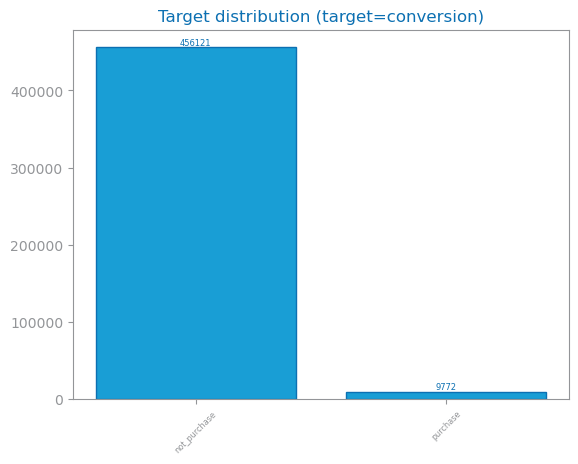

In [67]:
from matplotlib.pyplot import savefig, show
target = "conversion"

values: Series = df[target].value_counts()
print(values)

Figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
#savefig(f"images/{file_tag}_class_distribution.png")
show()

In [64]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
event_time             416924
event_type                  3
product_id              75699
category_id              1022
category_code             137
brand                    3131
price                   27575
user_id                364918
user_session           435433
category_code_lvl_1        13
category_code_lvl_2        60
category_code_lvl_3        90
conversion                  2
dtype: int64


In [20]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-28 16:39:42 UTC,view,5300763,2232732089269092627,NaN,vitek,14.65,584060554,eaf21c95-f487-4e80-9efa-97191347ed21
1,2020-04-17 05:50:27 UTC,view,11500878,2053013552259662037,computers.components.power_supply,max,59.18,512843949,a22ac4e0-d3c3-4b36-a6f5-fa9ca4f2df77
2,2020-04-22 08:06:21 UTC,view,14300048,2232732108168626872,apparel.underwear,yamaha,596.15,515829759,5d080575-9839-43b6-a387-c51d5f872e05
3,2020-04-16 10:05:51 UTC,view,26800074,2232732066611463064,NaN,NaN,704.27,538793961,9ee4800c-176b-4a3d-ab92-f13a98d1745e
4,2020-04-21 09:14:39 UTC,view,15902474,2053013566142809077,construction.tools.generator,NaN,45.61,641922020,e505c279-d878-4994-be66-35eef7f7e36a


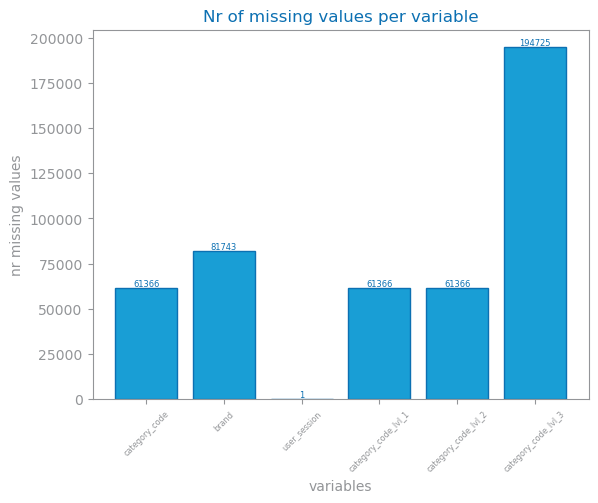

In [38]:

mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()

    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
#savefig(f"images/{file_tag}_mv.png")
show()

## Add columns based on dataset col

#### Data granularity

##### Split category_code column

In [21]:

# Create new columns based on the column category_based
df['category_code_lvl_1'] = df['category_code'].str.split(".").str[0] #Obter o 1º nivel do category code e criar nova coluna
df['category_code_lvl_2'] = df['category_code'].str.split(".").str[1] #Obter o 2º nivel do category code e criar nova coluna
df['category_code_lvl_3'] = df['category_code'].str.split(".").str[2] #Obter o 3º nivel do category code e criar nova coluna

#create column target based on the event_type column
#when event_type=purchase => purchase
#     event_type != purchase => not_purchase 

df['conversion'] = 'not_purchase'  # Definindo valor padrão
df.loc[df['event_type']=='purchase', 'conversion'] = 'purchase'

df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion
0,2020-04-28 16:39:42 UTC,view,5300763,2232732089269092627,NaN,vitek,14.65,584060554,eaf21c95-f487-4e80-9efa-97191347ed21,NaN,NaN,NaN,not_purchase
1,2020-04-17 05:50:27 UTC,view,11500878,2053013552259662037,computers.components.power_supply,max,59.18,512843949,a22ac4e0-d3c3-4b36-a6f5-fa9ca4f2df77,computers,components,power_supply,not_purchase
2,2020-04-22 08:06:21 UTC,view,14300048,2232732108168626872,apparel.underwear,yamaha,596.15,515829759,5d080575-9839-43b6-a387-c51d5f872e05,apparel,underwear,NaN,not_purchase
3,2020-04-16 10:05:51 UTC,view,26800074,2232732066611463064,NaN,NaN,704.27,538793961,9ee4800c-176b-4a3d-ab92-f13a98d1745e,NaN,NaN,NaN,not_purchase
4,2020-04-21 09:14:39 UTC,view,15902474,2053013566142809077,construction.tools.generator,NaN,45.61,641922020,e505c279-d878-4994-be66-35eef7f7e36a,construction,tools,generator,not_purchase
5,2020-04-18 09:47:02 UTC,view,1004750,2232732093077520756,construction.tools.light,samsung,203.35,643401542,16cd8b0b-3c74-4f2a-b237-a2dbe99b3d75,construction,tools,light,not_purchase
6,2020-04-24 07:12:53 UTC,view,18000776,2053013558525952589,electronics.smartphone,samsung,25.31,637746546,5295fe4e-18fc-4f10-9e91-641a638b739f,electronics,smartphone,NaN,not_purchase
7,2020-04-05 19:03:53 UTC,view,1480755,2053013563835941749,appliances.kitchen.refrigerators,hp,541.78,538130452,12ea6966-c047-45c7-a955-bcc31d74530a,appliances,kitchen,refrigerators,not_purchase
8,2020-04-09 11:06:48 UTC,view,4100126,2232732098228126185,apparel.shoes,sony,383.02,596706113,becd469a-2248-4008-a870-a9d640b36f52,apparel,shoes,NaN,not_purchase
9,2020-04-13 09:26:03 UTC,view,6200711,2232732091961835858,appliances.environment.air_heater,oasis,45.02,518722762,e9d3e6c4-ee94-44b0-a644-915ab2e3ca33,appliances,environment,air_heater,not_purchase


### Convert category_code_level_2 and category_code_level_3 into funnel pages.
- fill ategory_code_level_3 with values from category_code_level_2

This is needed because some product categories don't have category_code_lvl

In [22]:
# Atualizar a coluna category_code_lvl_2_new, preservando os valores NaN
df['category_code_lvl_2_new'] = df['category_code_lvl_2'].where(df['category_code_lvl_2'].isna(), df['category_code_lvl_1'] + "/" + df['category_code_lvl_2'])

# Primeiro, criar a coluna category_code_lvl_3_new com a concatenação de category_code_lvl_2 e category_code_lvl_3
df['category_code_lvl_3_new'] = df['category_code_lvl_2_new'] + "/" + df['category_code_lvl_3']

# Em seguida, preencher os NaN da coluna category_code_lvl_3_new com o valor já concatenado de category_code_lvl_2
df['category_code_lvl_3_new'] = df['category_code_lvl_3_new'].fillna(df['category_code_lvl_2_new'])

# Verificar as primeiras linhas do DataFrame
df.head(10)



,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,category_code_lvl_2_new,category_code_lvl_3_new
0,2020-04-28 16:39:42 UTC,view,5300763,2232732089269092627,NaN,vitek,14.65,584060554,eaf21c95-f487-4e80-9efa-97191347ed21,NaN,NaN,NaN,not_purchase,NaN,NaN
1,2020-04-17 05:50:27 UTC,view,11500878,2053013552259662037,computers.components.power_supply,max,59.18,512843949,a22ac4e0-d3c3-4b36-a6f5-fa9ca4f2df77,computers,components,power_supply,not_purchase,computers/components,computers/components/power_supply
2,2020-04-22 08:06:21 UTC,view,14300048,2232732108168626872,apparel.underwear,yamaha,596.15,515829759,5d080575-9839-43b6-a387-c51d5f872e05,apparel,underwear,NaN,not_purchase,apparel/underwear,apparel/underwear
3,2020-04-16 10:05:51 UTC,view,26800074,2232732066611463064,NaN,NaN,704.27,538793961,9ee4800c-176b-4a3d-ab92-f13a98d1745e,NaN,NaN,NaN,not_purchase,NaN,NaN
4,2020-04-21 09:14:39 UTC,view,15902474,2053013566142809077,construction.tools.generator,NaN,45.61,641922020,e505c279-d878-4994-be66-35eef7f7e36a,construction,tools,generator,not_purchase,construction/tools,construction/tools/generator
5,2020-04-18 09:47:02 UTC,view,1004750,2232732093077520756,construction.tools.light,samsung,203.35,643401542,16cd8b0b-3c74-4f2a-b237-a2dbe99b3d75,construction,tools,light,not_purchase,construction/tools,construction/tools/light
6,2020-04-24 07:12:53 UTC,view,18000776,2053013558525952589,electronics.smartphone,samsung,25.31,637746546,5295fe4e-18fc-4f10-9e91-641a638b739f,electronics,smartphone,NaN,not_purchase,electronics/smartphone,electronics/smartphone
7,2020-04-05 19:03:53 UTC,view,1480755,2053013563835941749,appliances.kitchen.refrigerators,hp,541.78,538130452,12ea6966-c047-45c7-a955-bcc31d74530a,appliances,kitchen,refrigerators,not_purchase,appliances/kitchen,appliances/kitchen/refrigerators
8,2020-04-09 11:06:48 UTC,view,4100126,2232732098228126185,apparel.shoes,sony,383.02,596706113,becd469a-2248-4008-a870-a9d640b36f52,apparel,shoes,NaN,not_purchase,apparel/shoes,apparel/shoes
9,2020-04-13 09:26:03 UTC,view,6200711,2232732091961835858,appliances.environment.air_heater,oasis,45.02,518722762,e9d3e6c4-ee94-44b0-a644-915ab2e3ca33,appliances,environment,air_heater,not_purchase,appliances/environment,appliances/environment/air_heater


In [8]:
#drop columns
# Remover as colunas temporárias (category_code_lvl_2_new e category_code_lvl_3_new se não precisar mais delas)
df.drop(columns=['category_code_lvl_2', 'category_code_lvl_3'], inplace=True)

df.rename(columns={
    'category_code_lvl_2_new': 'category_code_lvl_2', 
    'category_code_lvl_3_new': 'category_code_lvl_3'
}, inplace=True)

# Verificar as primeiras linhas do DataFrame
df.head(10)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_lvl_1,conversion,category_code_lvl_2,category_code_lvl_3
0,2020-04-29 05:29:16 UTC,view,4100346,2232732098228126185,apparel.shoes,sony,409.25,648872454,43e9e024-d144-476b-a469-4eb0c895ba13,apparel,not_purchase,apparel/shoes,apparel/shoes
1,2020-04-27 20:40:15 UTC,view,1005212,2232732093077520756,construction.tools.light,samsung,176.04,537208950,4727c6bb-2f58-4522-b8cd-955133b99a9f,construction,not_purchase,construction/tools,construction/tools/light
2,2020-04-01 00:32:14 UTC,view,1801503,2232732099754852875,appliances.personal.massager,xiaomi,203.09,550985043,8a9edb0e-9d66-bb0a-064f-47c75b51c805,appliances,not_purchase,appliances/personal,appliances/personal/massager
3,2020-04-23 03:17:29 UTC,view,15400255,2232732107774362287,NaN,intex,257.34,645766010,88ea65b6-e377-4c47-8e65-99e53566bc43,NaN,not_purchase,NaN,NaN
4,2020-04-14 14:58:10 UTC,view,1004249,2232732093077520756,construction.tools.light,apple,765.49,545296126,c5a568c5-8e2b-4785-8cca-76faa77fddff,construction,not_purchase,construction/tools,construction/tools/light
5,2020-04-29 05:08:36 UTC,view,4803894,2232732079706079299,sport.bicycle,jbl,48.62,647124381,da3322e6-b734-4c3b-9eb9-9ee8a36b22d3,sport,not_purchase,sport/bicycle,sport/bicycle
6,2020-04-26 21:19:15 UTC,view,1005014,2232732093077520756,construction.tools.light,samsung,434.70,647730995,7a7acd23-8343-49c2-b07c-f4504a0ee616,construction,not_purchase,construction/tools,construction/tools/light
7,2020-04-20 16:35:28 UTC,view,100098678,2053013554994348409,NaN,NaN,51.46,515707162,d69481b3-effe-44b9-9e25-23b75c567e46,NaN,not_purchase,NaN,NaN
8,2020-04-16 14:19:05 UTC,view,100084326,2232732086500851925,apparel.scarf,defacto,3.84,640808588,8c10cc64-0c48-4401-bfeb-086e4da9708b,apparel,not_purchase,apparel/scarf,apparel/scarf
9,2020-04-18 17:59:35 UTC,view,8801103,2053013560530830019,electronics.camera.video,olmio,21.89,515377062,6cb33a45-b437-4585-a20c-f0713e2fd546,electronics,not_purchase,electronics/camera,electronics/camera/video


In [23]:
# Definir a nova ordem das colunas
new_column_order = [
    'event_time', 
    'event_type', 
    'product_id', 
    'category_id', 
    'category_code', 
    'category_code_lvl_1',  # Mover esta coluna para perto dos níveis 2 e 3
    'category_code_lvl_2', 
    'category_code_lvl_3', 
    'brand', 
    'price', 
    'user_id', 
    'user_session', 
    'conversion'
]

# Reorganizar as colunas do DataFrame
df = df[new_column_order]

# Verificar as primeiras linhas do DataFrame com a nova ordem de colunas
df.head(10)

,event_time,event_type,product_id,category_id,category_code,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,brand,price,user_id,user_session,conversion
0,2020-04-28 16:39:42 UTC,view,5300763,2232732089269092627,NaN,NaN,NaN,NaN,vitek,14.65,584060554,eaf21c95-f487-4e80-9efa-97191347ed21,not_purchase
1,2020-04-17 05:50:27 UTC,view,11500878,2053013552259662037,computers.components.power_supply,computers,components,power_supply,max,59.18,512843949,a22ac4e0-d3c3-4b36-a6f5-fa9ca4f2df77,not_purchase
2,2020-04-22 08:06:21 UTC,view,14300048,2232732108168626872,apparel.underwear,apparel,underwear,NaN,yamaha,596.15,515829759,5d080575-9839-43b6-a387-c51d5f872e05,not_purchase
3,2020-04-16 10:05:51 UTC,view,26800074,2232732066611463064,NaN,NaN,NaN,NaN,NaN,704.27,538793961,9ee4800c-176b-4a3d-ab92-f13a98d1745e,not_purchase
4,2020-04-21 09:14:39 UTC,view,15902474,2053013566142809077,construction.tools.generator,construction,tools,generator,NaN,45.61,641922020,e505c279-d878-4994-be66-35eef7f7e36a,not_purchase
5,2020-04-18 09:47:02 UTC,view,1004750,2232732093077520756,construction.tools.light,construction,tools,light,samsung,203.35,643401542,16cd8b0b-3c74-4f2a-b237-a2dbe99b3d75,not_purchase
6,2020-04-24 07:12:53 UTC,view,18000776,2053013558525952589,electronics.smartphone,electronics,smartphone,NaN,samsung,25.31,637746546,5295fe4e-18fc-4f10-9e91-641a638b739f,not_purchase
7,2020-04-05 19:03:53 UTC,view,1480755,2053013563835941749,appliances.kitchen.refrigerators,appliances,kitchen,refrigerators,hp,541.78,538130452,12ea6966-c047-45c7-a955-bcc31d74530a,not_purchase
8,2020-04-09 11:06:48 UTC,view,4100126,2232732098228126185,apparel.shoes,apparel,shoes,NaN,sony,383.02,596706113,becd469a-2248-4008-a870-a9d640b36f52,not_purchase
9,2020-04-13 09:26:03 UTC,view,6200711,2232732091961835858,appliances.environment.air_heater,appliances,environment,air_heater,oasis,45.02,518722762,e9d3e6c4-ee94-44b0-a644-915ab2e3ca33,not_purchase


##### Split event_time column

In [24]:
# Split the event_time column to have more information and detail on the:
# - day_of_month
# - day_ok_week 
# - is_weekend
# - moment_of_day
# -hour
# - min
#As the dataset only as data from s sepecific month of 2020, we don't need to get the year, quarter and month.
#These attribute may influence the purchase of the users


# Converter a coluna 'event_time' para datetime
df['event_time'] = pd.to_datetime(df['event_time'], utc=True)

# Create new columns based on date column 'event_time'

df['week_of_month'] = df['event_time'].apply(lambda x: (x.day - 1) // 7 + 1)
df['is_weekend'] = df['event_time'].dt.weekday.apply(lambda x: "weekend" if x >= 5 else "weekday") 

df['day_of_week'] = df['event_time'].dt.day_name()# Monday=0, Sunday=6
df['day'] = df['event_time'].dt.day
df['hour'] = df['event_time'].dt.hour
df['min'] = df['event_time'].dt.minute

#create function to get time of the day
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 22:
        return 'evening'
    else:
        return 'night'

df['time_of_day']= df['hour'].apply(get_time_of_day)
    
df.head()


,event_time,event_type,product_id,category_id,category_code,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,brand,price,user_id,user_session,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,2020-04-28 16:39:42+00:00,view,5300763,2232732089269092627,NaN,NaN,NaN,NaN,vitek,14.65,584060554,eaf21c95-f487-4e80-9efa-97191347ed21,not_purchase,4,weekday,Tuesday,28,16,39,afternoon
1,2020-04-17 05:50:27+00:00,view,11500878,2053013552259662037,computers.components.power_supply,computers,components,power_supply,max,59.18,512843949,a22ac4e0-d3c3-4b36-a6f5-fa9ca4f2df77,not_purchase,3,weekday,Friday,17,5,50,morning
2,2020-04-22 08:06:21+00:00,view,14300048,2232732108168626872,apparel.underwear,apparel,underwear,NaN,yamaha,596.15,515829759,5d080575-9839-43b6-a387-c51d5f872e05,not_purchase,4,weekday,Wednesday,22,8,6,morning
3,2020-04-16 10:05:51+00:00,view,26800074,2232732066611463064,NaN,NaN,NaN,NaN,NaN,704.27,538793961,9ee4800c-176b-4a3d-ab92-f13a98d1745e,not_purchase,3,weekday,Thursday,16,10,5,morning
4,2020-04-21 09:14:39+00:00,view,15902474,2053013566142809077,construction.tools.generator,construction,tools,generator,NaN,45.61,641922020,e505c279-d878-4994-be66-35eef7f7e36a,not_purchase,3,weekday,Tuesday,21,9,14,morning


In [25]:
df.dtypes

event_time             datetime64[ns, UTC]
event_type                          object
product_id                           int64
category_id                          int64
category_code                       object
category_code_lvl_1                 object
category_code_lvl_2                 object
category_code_lvl_3                 object
brand                               object
price                              float64
user_id                              int64
user_session                        object
conversion                          object
week_of_month                        int64
is_weekend                          object
day_of_week                         object
day                                  int32
hour                                 int32
min                                  int32
time_of_day                         object
dtype: object

## Remove columns with ids

In [26]:
#drop id columns that are not relevant for the prediction of the class

df = df.drop(columns=['event_time', 'category_id', 'category_code','user_session','user_id'])

df.head(10)

,event_type,product_id,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,brand,price,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,view,5300763,NaN,NaN,NaN,vitek,14.65,not_purchase,4,weekday,Tuesday,28,16,39,afternoon
1,view,11500878,computers,components,power_supply,max,59.18,not_purchase,3,weekday,Friday,17,5,50,morning
2,view,14300048,apparel,underwear,NaN,yamaha,596.15,not_purchase,4,weekday,Wednesday,22,8,6,morning
3,view,26800074,NaN,NaN,NaN,NaN,704.27,not_purchase,3,weekday,Thursday,16,10,5,morning
4,view,15902474,construction,tools,generator,NaN,45.61,not_purchase,3,weekday,Tuesday,21,9,14,morning
5,view,1004750,construction,tools,light,samsung,203.35,not_purchase,3,weekend,Saturday,18,9,47,morning
6,view,18000776,electronics,smartphone,NaN,samsung,25.31,not_purchase,4,weekday,Friday,24,7,12,morning
7,view,1480755,appliances,kitchen,refrigerators,hp,541.78,not_purchase,1,weekend,Sunday,5,19,3,evening
8,view,4100126,apparel,shoes,NaN,sony,383.02,not_purchase,2,weekday,Thursday,9,11,6,morning
9,view,6200711,appliances,environment,air_heater,oasis,45.02,not_purchase,2,weekday,Monday,13,9,26,morning


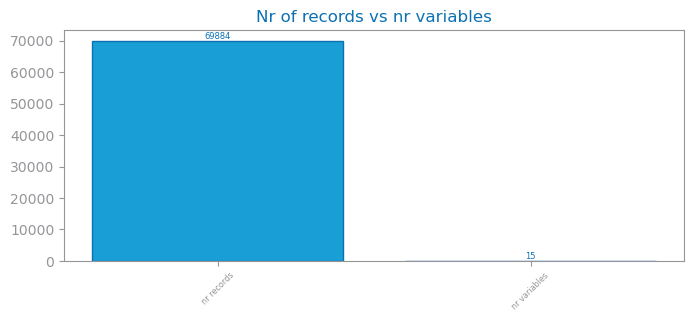

In [27]:
from matplotlib.pyplot import figure, savefig, show


figure(figsize=(8, 3)) #(largura,altura) 

values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}

#df_shape[0] - retorna o numero de linhas
#df_shape[1] - retorna o numero de colunas


plot_bar_chart(
    list(values.keys())\
    ,list(values.values())\
    ,title="Nr of records vs nr variables"
)
#savefig(f"images/{file_tag}_records_variables.png")
show()

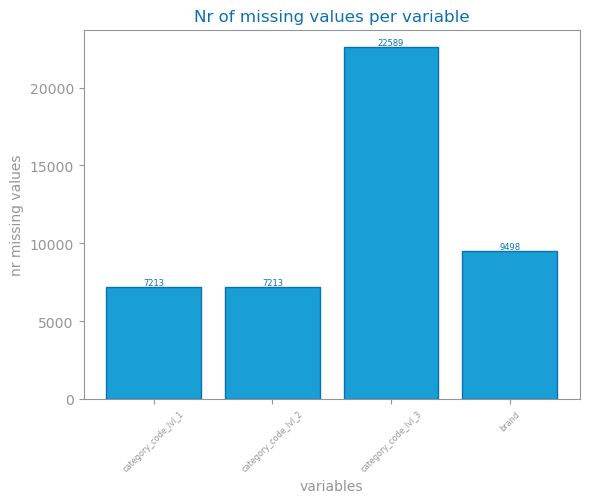

In [28]:

mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()

    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
#savefig(f"images/{file_tag}_mv.png")
show()

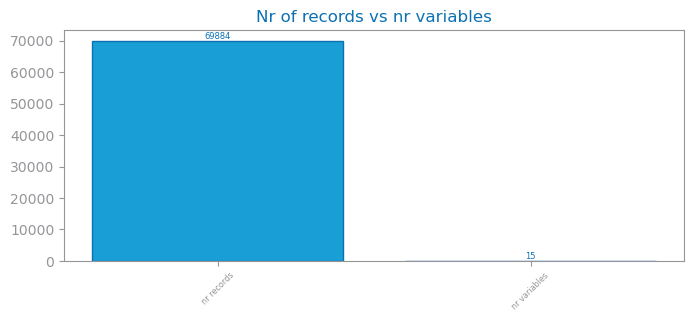

In [29]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(8, 3))
values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
#savefig(f"images/{file_tag}_records_variables.png")
show()

conversion
not_purchase    68499
purchase         1385
Name: count, dtype: int64


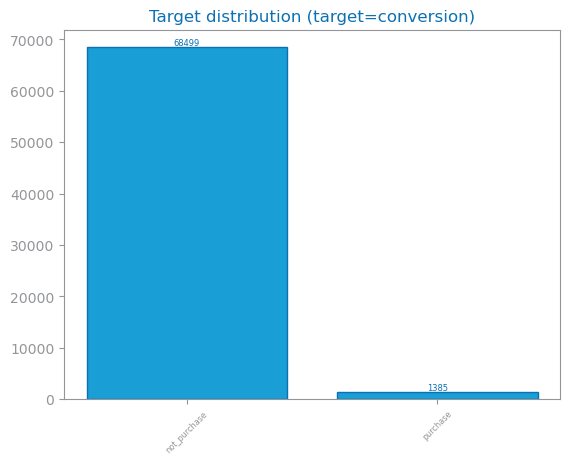

In [30]:
from matplotlib.pyplot import savefig, show
target = "conversion"

values: Series = df[target].value_counts()
print(values)

Figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
#savefig(f"images/{file_tag}_class_distribution.png")
show()

# Save final df from pre_processing phase into a csv file
- We will use this dataset for the next phase - data profiling

In [ ]:
# Definir o caminho para salvar o arquivo CSV
filepath = r'dataset/df_ecom_pre_proc_vProd_id.csv'

# Salvar o DataFrame em CSV
df.to_csv(filepath, index=False)